In [2]:
! unzip dataset/iris.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd

df = pd.read_csv('dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Igris dataset:
* 50 samples of 3 different species of iris (150 samples)
* Measurement: sepal length, sepal width, petal length, petal width


In [5]:
from typing import ParamSpec
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

In [6]:
sns.set()

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Data Preparation**

In [8]:
df[df.columns]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
col = "SepalLengthCm"
plt.suptitle("SepalLengthCm")
plt.hist(df[col])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

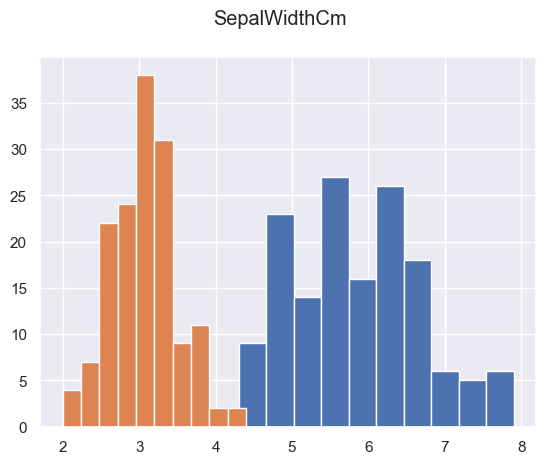

In [11]:
col = "SepalWidthCm"
plt.suptitle("SepalWidthCm")
plt.hist(df[col])
plt.show()

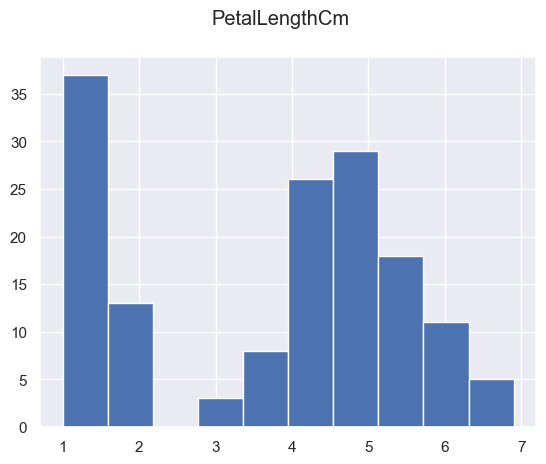

In [12]:
col = "PetalLengthCm"
plt.suptitle("PetalLengthCm")
plt.hist(df[col])
plt.show()

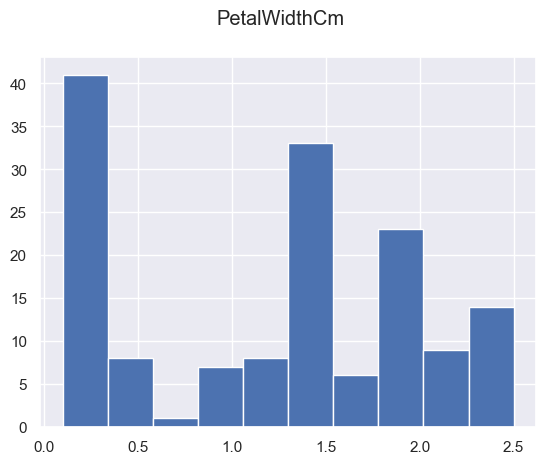

In [13]:
col = "PetalWidthCm"
plt.suptitle("PetalWidthCm")
plt.hist(df[col])
plt.show()

Relation


In [14]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Relationship


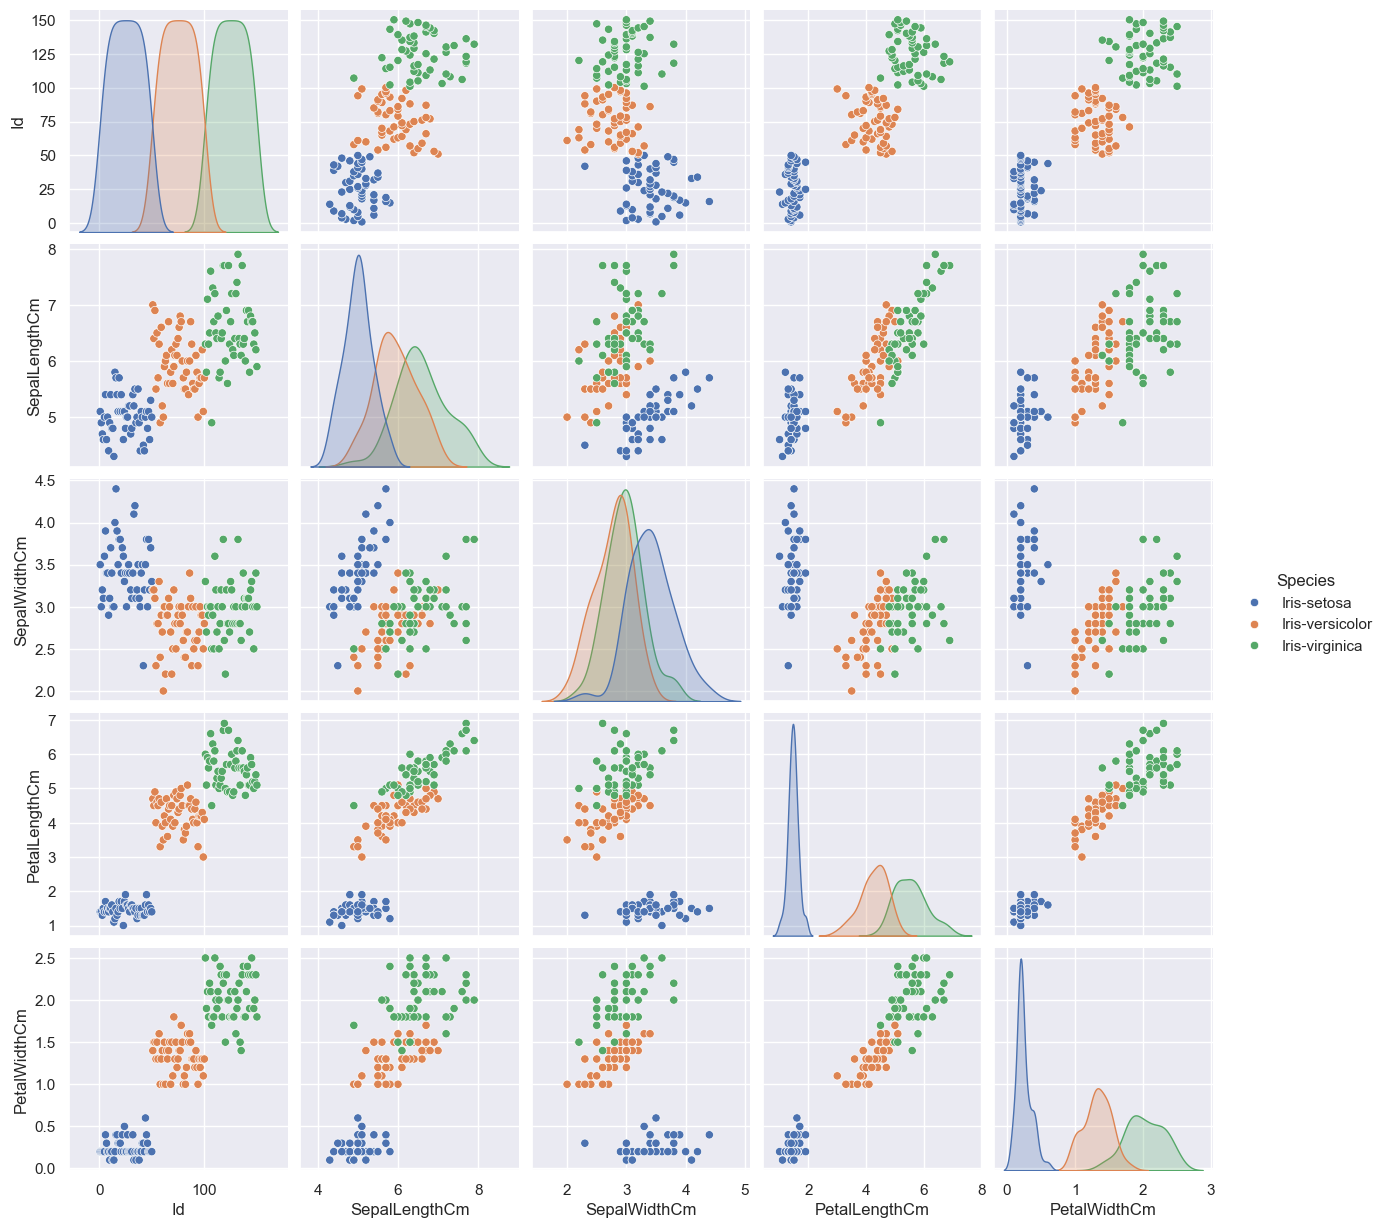

In [15]:
sns.pairplot(df, hue="Species")
plt.show()

Train test split


In [16]:
df["Target"] = df["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [17]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size=0.25)


In [18]:
df_train.shape
df_test.shape

(38, 7)

In [19]:
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
72,73,6.3,2.5,4.9,1.5,Iris-versicolor,1
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,1
23,24,5.1,3.3,1.7,0.5,Iris-setosa,0
121,122,5.6,2.8,4.9,2.0,Iris-virginica,2
110,111,6.5,3.2,5.1,2.0,Iris-virginica,2


Prepare data for modeling

In [20]:
x_train = df_train.drop(columns=["Species", "Id", "Target"]).values
y_train = df_train["Target"].values
y_train

array([1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2], dtype=int64)

Model
- Most baseline: Random guessing -> accuracy = 33 % since data distributed equally
- Manual model:
+ Seeing that with PetalLength <= 2 => setosa
+                  PetalLength < ~ 4.8 => versicolor
+                  Else => virginica

In [21]:
# Manual

def simple_predict(petal_length):
    if(petal_length < 2.5):
        return 0
    elif(petal_length < 4.8):
        return 1
    else:
        return 2



In [22]:
simple_prediction = [simple_predict(x) for x in x_train[:,2]]
np.mean(simple_prediction == y_train)

# acc = 96.42%  

0.9464285714285714

Supervised learning: Logistic Regression

In [23]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
# max_iter la so vong lap toi da de tim loss

In [24]:
xT, xV, yT, yV = train_test_split(x_train,y_train)
# use test set to test model


In [25]:
model.fit(xT,yT)

LogisticRegression(max_iter=200)

In [26]:
model_accuracy = model.predict(xV)
# np.mean(model_accuracy == yV)
model.score(xV, yV)

1.0

Cross validation


In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [28]:
model = LogisticRegression()

In [29]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
# accuracies
np.mean(accuracies)

0.9466403162055336

Misclarifying

In [30]:
y_pred = cross_val_predict(model, x_train, y_train)
predicted_correctly = y_pred == y_train
predicted_incorrectly = ~predicted_correctly
# predicted_incorrectly


In [31]:
x_train[predicted_incorrectly]

array([[6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.7, 5.1, 1.6]])

In [32]:
df_predictions = df_train.copy()


In [33]:
df_predictions["correct_predictions"] = predicted_correctly
df_predictions["prediction"] = y_pred
df_predictions["prediction_label"] = df_predictions["prediction"].map({
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"})

In [34]:
df_predictions.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target,correct_predictions,prediction,prediction_label
72,73,6.3,2.5,4.9,1.5,Iris-versicolor,1,True,1,Iris-versicolor
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,1,True,1,Iris-versicolor
23,24,5.1,3.3,1.7,0.5,Iris-setosa,0,True,0,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica,2,True,2,Iris-virginica
110,111,6.5,3.2,5.1,2.0,Iris-virginica,2,True,2,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica,2,True,2,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa,0,True,0,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa,0,True,0,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor,1,True,1,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa,0,True,0,Iris-setosa


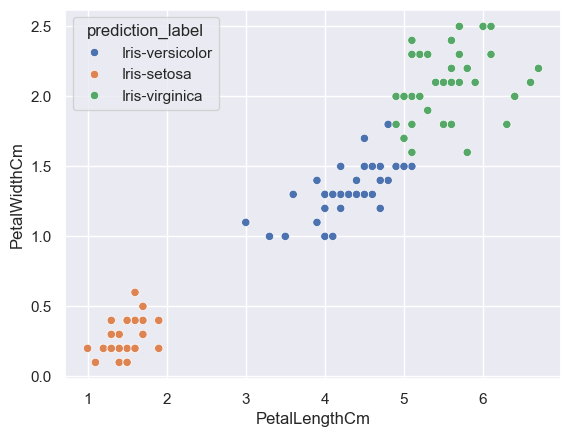

In [35]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="prediction_label", data=df_predictions)
plt.show()

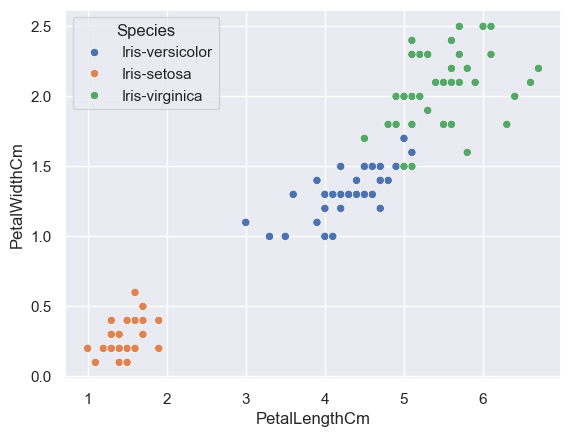

In [36]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df_predictions)
plt.show()

In [37]:
def plot_incorrect_predictions(df, x_col, y_col):
    fig, axs = plt.subplots(2,2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_col, y=y_col, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_col, y=y_col, hue="Species", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_col, y=y_col, hue="correct_predictions", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

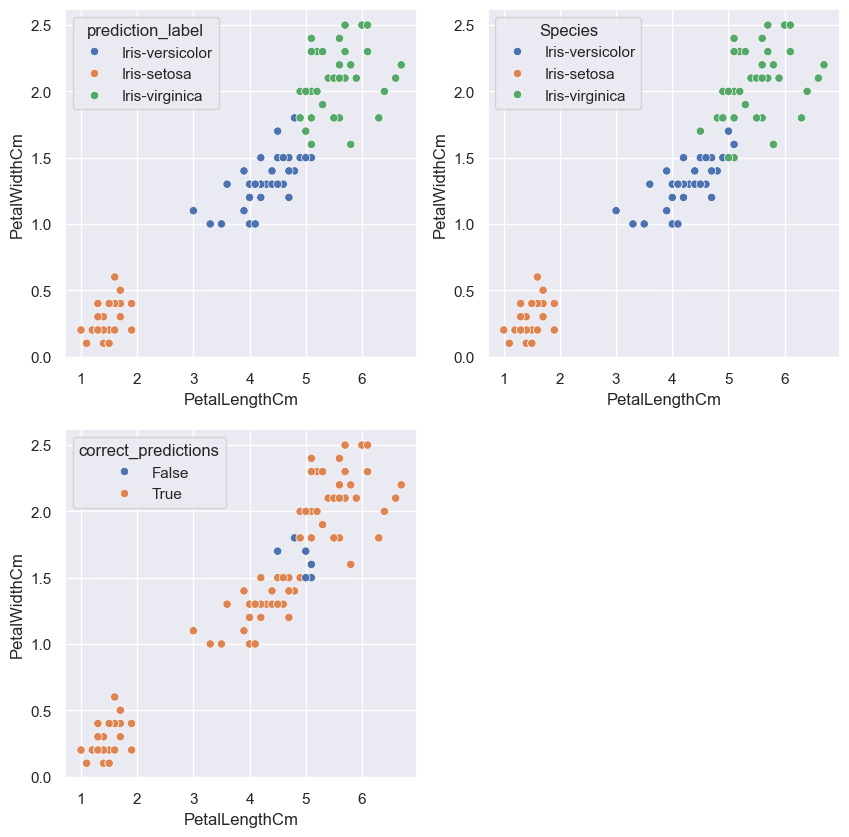

In [38]:
plot_incorrect_predictions(df_predictions, "PetalLengthCm", "PetalWidthCm")

Tuning

In [93]:
model = LogisticRegression(max_iter=200, C=20)
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
print("Mean accuracy:", np.mean(accuracies))

Mean accuracy: 0.9731225296442687


In [51]:
model.fit(x_train, y_train)

LogisticRegression(C=20, max_iter=200)

In [52]:
model.predict([[5.1, 3.5, 1.4, 0.2]])

array([0], dtype=int64)

Supervised learning: K-nearest neighbors

In [66]:
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score


In [84]:
model = neighbors.KNeighborsClassifier(n_neighbors=10, p = 2, weights="distance") 
# n_neighbors la so luong quan sat gan nhat de dua ra du doan = k
# p = 2 la norm 2, khoang cach euclidean
model.fit(xT, yT)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [85]:
y_pred = model.predict(xV)
np.mean(y_pred == yV)

0.9642857142857143

In [87]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
cc = accuracy_score(yV, y_pred)
print("Accuracy:", cc)

Accuracy: 0.9642857142857143
